In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DATA
Xtrain = np.array([[375,135,458,475],
                   [57,47,53,73],
                   [245,267,242,227],
                   [1472,1494,1462,1582],
                   [105,66,103,103],
                   [54,41,62,64],
                   [193,209,184,235],
                   [147,93,122,160],
                   [1102,674,957,1137],
                   [720,1033,566,874],
                   [253,143,171,265],
                   [685,586,750,803],
                   [488,355,418,570],
                   [198,187,220,203],
                   [360,334,337,365],
                   [1374,1506,1572,1256],
                   [156,139,147,175],
                   ])

# We need DATA with the form elements to characteristics, so we take transpose
Xtrain = Xtrain.T

# The objective is calculate eigenvalues and eigenvectors for pca
# First calculate covariance matrix
covX = np.cov(Xtrain.T)
# Then calculate eigenvalues and eigenvectors
lambdas, Q = np.linalg.eigh(covX)

# Order eigenvalues from max to min
idx = np.argsort(-lambdas)
lambdas = lambdas[idx]
lambdas = np.maximum(lambdas, 0)
# Ordering corresponding eigenvector for each eigenvalue
Q = Q[:,idx]
# Calculate all corresponding values for each transformation of coordinates(PCA),
Z = Xtrain.dot(Q)

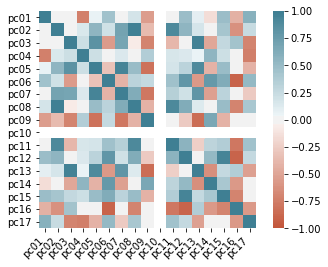

In [53]:
# Displaying correlation matrix between the 17 principal components
pcs = ['pc01','pc02','pc03','pc04','pc05','pc06','pc07','pc08','pc09','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17']
df = pd.DataFrame(Z,columns=pcs)
corr = df.corr()
import seaborn as sns
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
# As we can see pc01 and pc02 have little correlation

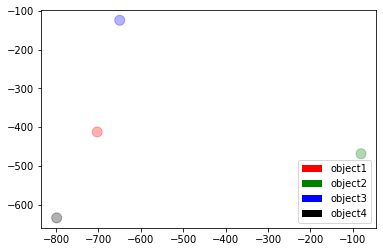

In [55]:
# Displaying results with data projected to pc01 and pc02
import matplotlib.patches as mpatches
colours = ['r','g','b','k']
celestial_objects = ['object1','object2','object3','object4']
recs=[]
for i in range(0,len(colours)):
  recs.append(mpatches.Rectangle((0,0),1,1,fc=colours[i]))

plt.scatter(Z[:,0],Z[:,1],s=100,c=colours,alpha=0.3) # so we just take first two coordinates(PC1,PC2)
plt.legend(recs,celestial_objects,loc=4)
plt.show()
# We can observe that green circle equals to object2 is too diferent from the others,
# so object2 does not behave like a star